In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#df=sns.load_dataset('titanic')
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()


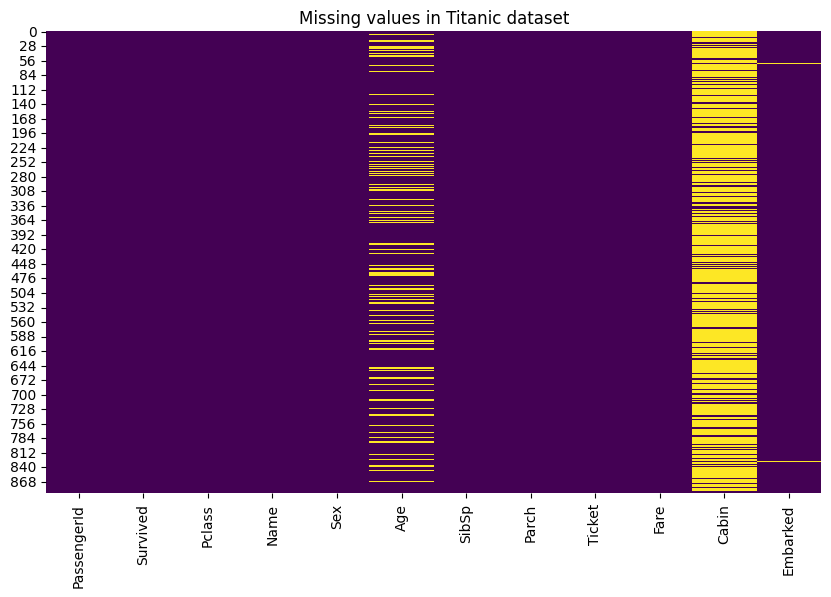

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing values in Titanic dataset")
plt.show()

In [17]:
df.isnull().sum()


df['Age'] = df['Age'].fillna(df['Age'].median())

 # 이유: 이상치 영향을 줄이기 위해 중앙값 사용


df['Cabin'] = df['Cabin'].fillna('Unknown')#이유:결측치가 너무 많음

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])#이유: 결측치가 적어서 최빈값으로



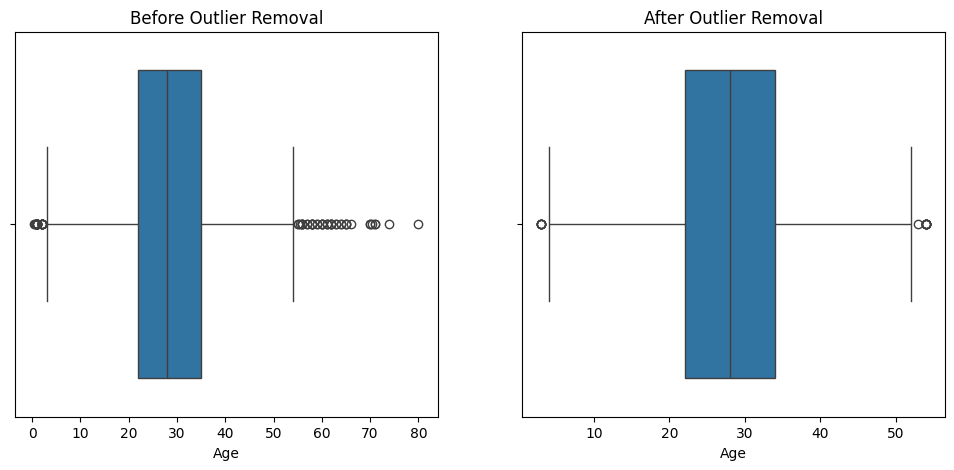

In [18]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

df_cleaned = df[(df['Age']>= lower_bound)&(df['Age']<=upper_bound)].copy()
#이상치 제거 이전
fig,axes =plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x=df['Age'],ax=axes[0])
axes[0].set_title('Before Outlier Removal')

#이상치 제거 이후
sns.boxplot(x=df_cleaned['Age'],ax=axes[1])
axes[1].set_title('After Outlier Removal')
plt.tight_layout
plt.show()

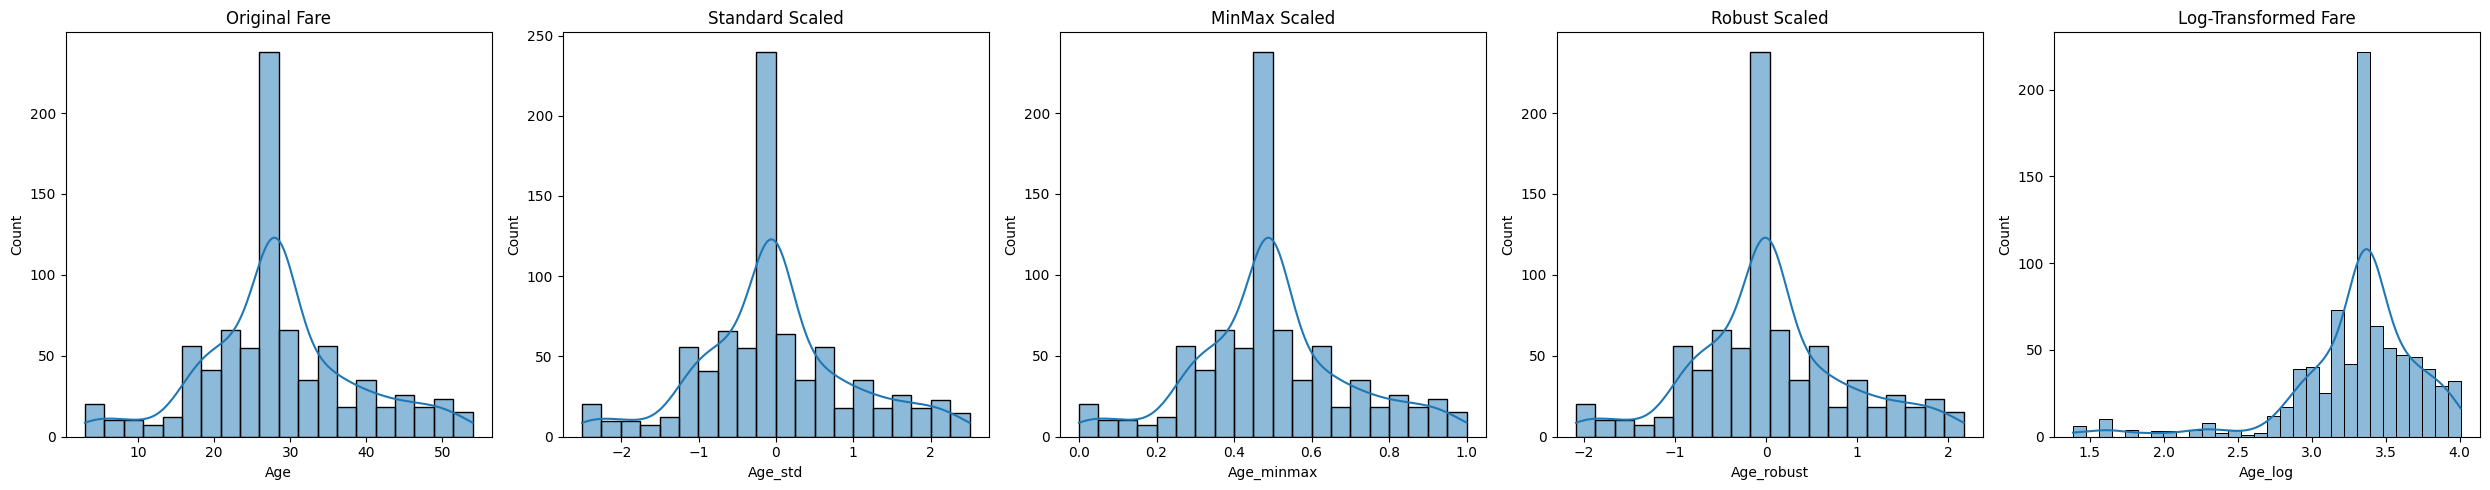

In [19]:
scaler_std=StandardScaler()
scaler_minmax=MinMaxScaler()
scaler_robust = RobustScaler()

df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

df_cleaned['Age_std']= scaler_std.fit_transform(df_cleaned[['Age']])
df_cleaned['Age_minmax']=scaler_minmax.fit_transform(df_cleaned[['Age']])
df_cleaned['Age_robust']=scaler_robust.fit_transform(df_cleaned[['Age']])
df_cleaned['Age_log'] = np.log1p(df_cleaned['Age'])

#스케일링 비교 시각화
fig,axes= plt.subplots(1,5,figsize=(25,5))
sns.histplot(df_cleaned['Age'],kde=True,ax=axes[0]).set(title='Original Fare')
sns.histplot(df_cleaned['Age_std'],kde=True,ax=axes[1]).set(title='Standard Scaled')
sns.histplot(df_cleaned['Age_minmax'],kde=True,ax=axes[2]).set(title='MinMax Scaled')
sns.histplot(df_cleaned['Age_robust'], kde=True, ax=axes[3]).set(title='Robust Scaled')
sns.histplot(df_cleaned['Age_log'], kde=True, ax=axes[4]).set(title="Log-Transformed Fare")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)  # 결측치 제거

# 범주형 → 숫자로 변환
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 입력/출력 나누기
X = df.drop(columns=['Survived'])
y = df['Survived']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 스케일링 함수 정의 (수정하지 마세요)
def scale_age(X_train, X_test, scaler):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled['Age'] = scaler.fit_transform(X_train[['Age']])
    X_test_scaled['Age'] = scaler.transform(X_test[['Age']])
    return X_train_scaled, X_test_scaled

# ✅ KNN 평가 함수 (수정하지 마세요)
def evaluate_knn(X_train, X_test, y_train, y_test, label):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{label:<20} Accuracy: {acc:.4f}')

#✅ 아래 코드를 실행하려면 빈칸을 채워보세요
# 1. 스케일링 없이 원본 데이터로 평가
evaluate_knn(X_train, X_test, y_train, y_test, "No Scaling")

# 2. StandardScaler 적용
X_train_std, X_test_std = scale_age(X_train, X_test, StandardScaler())
evaluate_knn(X_train, X_test, y_train, y_test, "StandardScaler")

# 3. MinMaxScaler 적용
X_train_minmax, X_test_minmax = scale_age(X_train, X_test, MinMaxScaler())
evaluate_knn(X_train, X_test, y_train, y_test, "MinMaxScaler")

# 4. RobustScaler 적용
X_train_robust, X_test_robust = scale_age(X_train, X_test, RobustScaler())
evaluate_knn(X_train, X_test, y_train, y_test, "RobustScaler")

No Scaling           Accuracy: 0.6983
StandardScaler       Accuracy: 0.6983
MinMaxScaler         Accuracy: 0.6983
RobustScaler         Accuracy: 0.6983


<ipython-input-21-dfcff08a34d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # 결측치 제거
<ipython-input-21-dfcff08a34d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-21-dfcff08a34d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

| 항목       | 전처리 전                   | 전처리 후                   |
| -------- | ----------------------- | ----------------------- |
| 행 수      | 891                     | 712                     |
| 열 수      | 12                      | 6                       |
| 제거된 컬럼   | Name, Ticket, Cabin 등   | —                       |
| 결측치 처리   | Age, Embarked 등 결측치 존재  | 결측치 제거 완료               |
| 컬럼 타입 변화 | Sex(str), Embarked(str) | Sex(int), Embarked(int) |
